In [49]:
import pickle
with open ('fashion_content', 'rb') as fp:
    itemlist = pickle.load(fp)
with open ('beauty_content', 'rb') as fp:
    itemlist2 = pickle.load(fp)
with open ('news_content', 'rb') as fp:
    itemlist3 = pickle.load(fp)

In [50]:
all_articles = "\n \n new article \n".join(itemlist)
all_articles_beauty = "\n \n new article \n".join(itemlist2)
all_articles_news = "\n \n new article \n".join(itemlist3)


In [14]:
print(all_articles[:5001])

© Courtesy of: CRAIG GREEN 
Fashion 
The three-time winner of the British Fashion Council’s Menswear Designer award gives Vogue an insight into his latest collection via his personal Polaroid pictures 
Craig Green is feeling positive, and his SS20 show—a true London Fashion Week Men’s highlight – showed that in colour-soaked abundance. 
His references ranged from Mexican papel picado (Easter flags)—“so throwaway, but also about resurrection and hope”; to mirrors—“I always think of mirrors as possibilities, but also the idea of scrutinising yourself”; Egyptian death rituals—“being put into a tomb, all the way through your life, you’re never that protected!”; and using skin as a material. And true to form, Green effortlessly weaves them all together, this season in a palette of cobalt blue, powdery pink and vibrant orange. 
“The aim is to make it look effortless,” he laughs. “Sometimes you don't know how they are going to go together, but we are hopeful that they will kind of counterbala

In [4]:
import spacy
import re
import nltk
import collections
nltk.download('stopwords') 
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from nltk.util import ngrams
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

nlp = spacy.load('en_core_web_sm')
STOPWORDS = nlp.Defaults.stop_words



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\favia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\favia\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\favia\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\favia\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\favia\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [53]:
def top_n(tokens, n):
    counter = collections.Counter(tokens)
    if(n>len(tokens)):
        return(counter.most_common(len(tokens)))
    else:
        return(counter.most_common(n))


def find_characters_nlp(text,top=15):
    people = []
    for sent in nltk.sent_tokenize(text):
        tagged = nltk.pos_tag(nltk.word_tokenize(sent))
        for chunk in nltk.ne_chunk(tagged):
            if hasattr(chunk, 'label') and chunk.label() == 'PERSON':
                name = ' '.join(c[0] for c in chunk)
                people.append(name)
        
    final_list = top_n(people,top)
    final_list = [(''.join(i[0]),i[1]) for i in final_list]
    return final_list


def split_text_into_tokens(text):
    re_pattern = re.compile("['A-Za-z0-9]+-?['A-Za-z0-9]+")
    tokens = re_pattern.findall(text)
    return [i.strip("'") for i in tokens]

def bi_grams(text):
    return ngrams(text, 2)

def find_characters_v2(text, stopwords=[], top=15):
    tokens = split_text_into_tokens(text)
    bi_gram = bi_grams(tokens)
    final_names = [i for i in bi_gram if i!= None if i[0][0]==i[0][0].upper() and i[1][0]==i[1][0].upper() and i[0] not in stopwords]
    final_list = top_n(tokens,top)
    final_list = [(' '.join(i[0]),i[1]) for i in final_list]
    return final_list

def find_characters_v1(text, stopwords=[], top=15):
    tokens = split_text_into_tokens(text)
    tokens = [i for i in tokens if i != None and i.lower() not in stopwords and i[0] == i[0].upper()]
    return top_n(tokens,top)

def find_characters_nlp2(text,top=15):
    people = []
    for sent in nltk.sent_tokenize(text):
        tagged = nltk.pos_tag(nltk.word_tokenize(sent))

        for chunk in nltk.ne_chunk(tagged):
            if len(chunk)>1 and chunk[1]=='NNP':
                people.append(chunk[0])
        
    final_list = top_n(people,top)
    return final_list

print(find_characters_nlp2(all_articles))
#print(find_characters_v2(all_articles,STOPWORDS, 15))
#print(find_characters_v1(all_articles,STOPWORDS, 15))

[('©', 6550), ('Nast', 5067), ('Condé', 5060), ('Fashion', 4383), ('”', 4241), ('Vogue', 3830), ('’', 3608), ('Content', 2240), ('Gallery', 1940), ('CNI', 1680), ('“', 1640), (']', 1504), ('|||', 1399), ('@', 1146), ('User', 1121)]


In [45]:
def find_adjectives_nlp(text,top=15):
    people = []
    for sent in nltk.sent_tokenize(text):
        tagged = nltk.pos_tag(nltk.word_tokenize(sent))

        for chunk in nltk.ne_chunk(tagged):
            if len(chunk)>1 and chunk[1]=='JJ':
                people.append(chunk[0])
        
    final_list = top_n(people,top)
    return final_list

top40 = find_adjectives_nlp(all_articles,50)

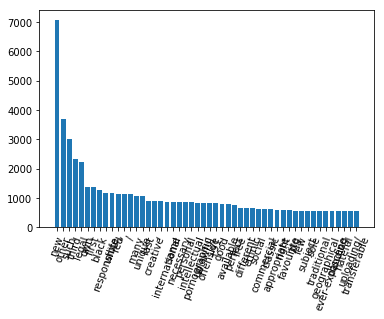

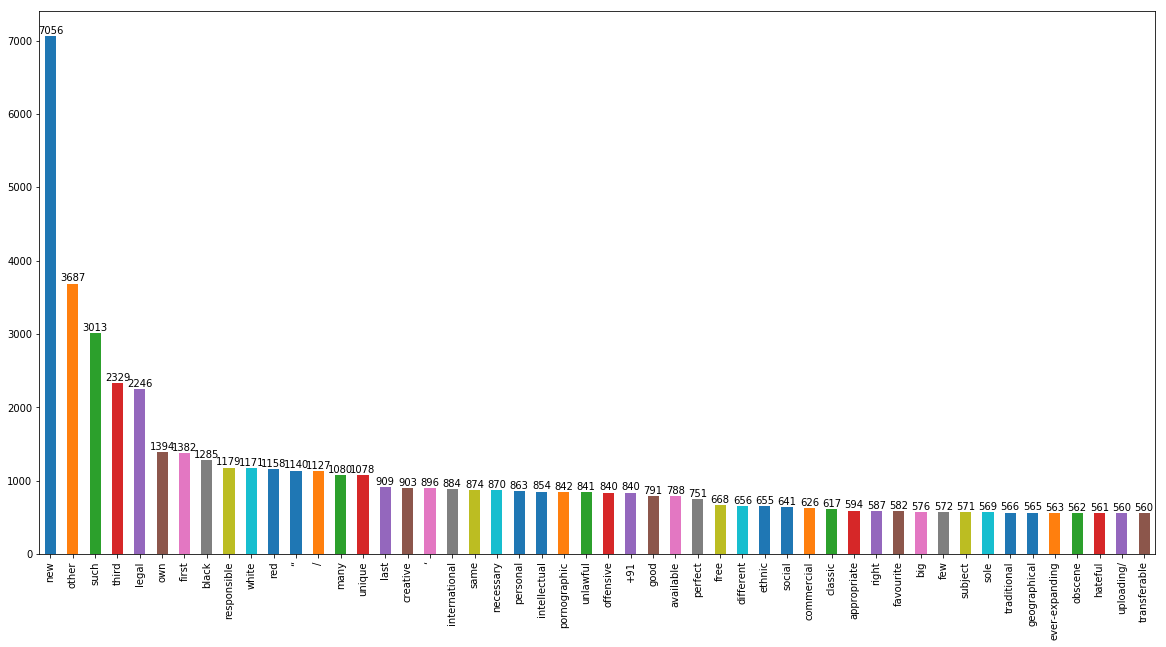

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.bar(range(len(top40)), [val[1] for val in top40], align='center')
plt.xticks(range(len(top40)), [val[0] for val in top40])
plt.xticks(rotation=70)
#plt.show()
x_labels = [val[0] for val in top40]
y_labels = [val[1] for val in top40]
plt.figure(figsize=(20, 10))
ax = pd.Series(y_labels).plot(kind='bar')
ax.set_xticklabels(x_labels)

rects = ax.patches

for rect, label in zip(rects, y_labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

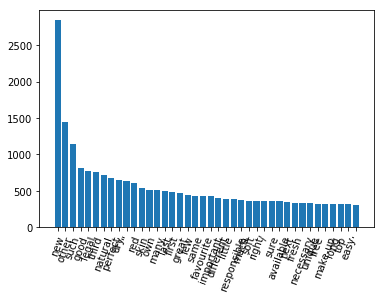

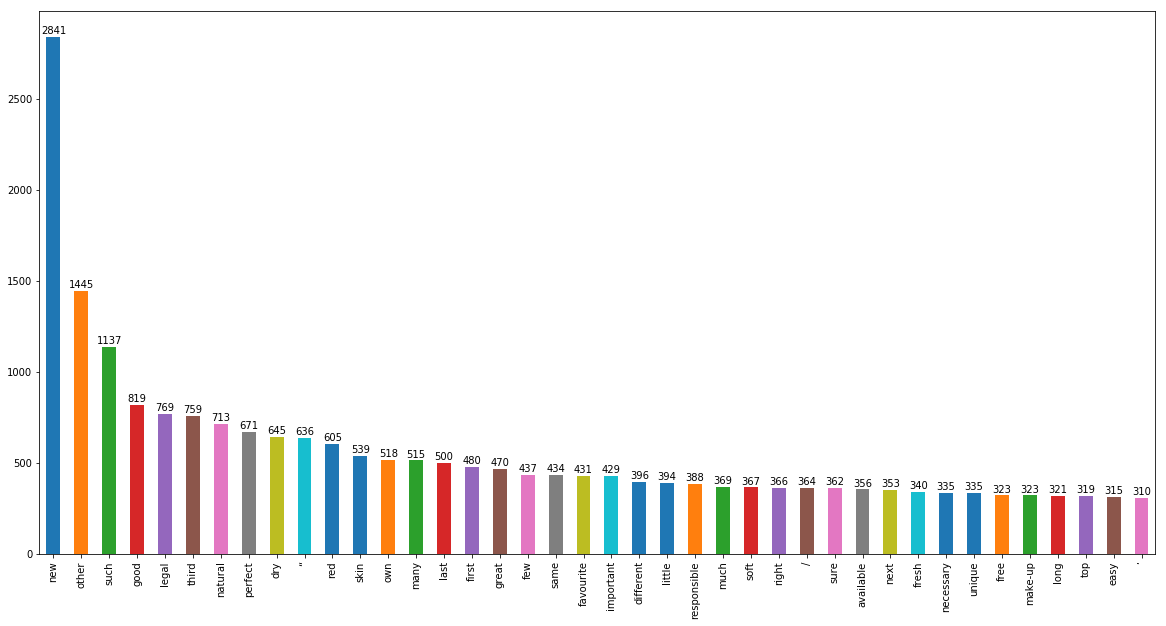

In [51]:
top40_beauty = find_adjectives_nlp(all_articles_beauty,40)

plt.bar(range(len(top40_beauty)), [val[1] for val in top40_beauty], align='center')
plt.xticks(range(len(top40_beauty)), [val[0] for val in top40_beauty])
plt.xticks(rotation=70)
#plt.show()
x_labels = [val[0] for val in top40_beauty]
y_labels = [val[1] for val in top40_beauty]
plt.figure(figsize=(20, 10))
ax = pd.Series(y_labels).plot(kind='bar')
ax.set_xticklabels(x_labels)

rects = ax.patches

for rect, label in zip(rects, y_labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

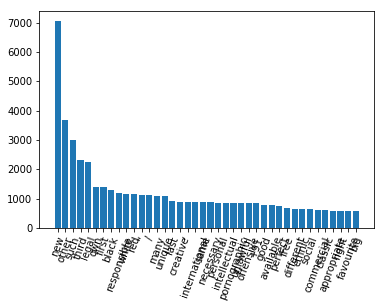

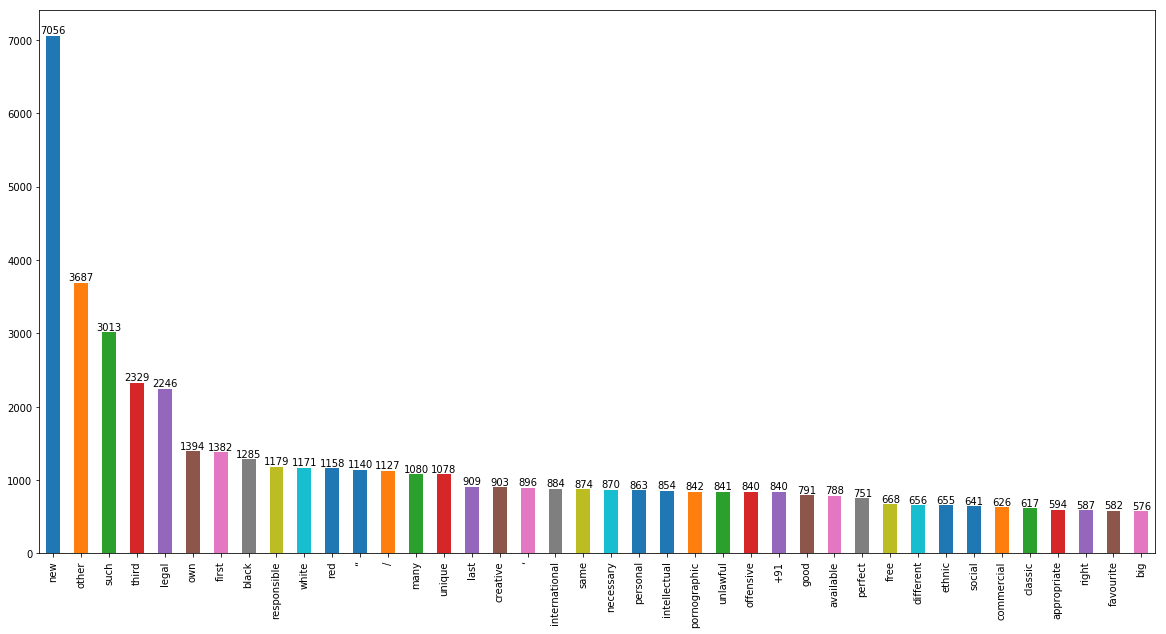

In [52]:
top40_news = find_adjectives_nlp(all_articles_news,40)

plt.bar(range(len(top40_news)), [val[1] for val in top40_news], align='center')
plt.xticks(range(len(top40_news)), [val[0] for val in top40_news])
plt.xticks(rotation=70)
#plt.show()
x_labels = [val[0] for val in top40_news]
y_labels = [val[1] for val in top40_news]
plt.figure(figsize=(20, 10))
ax = pd.Series(y_labels).plot(kind='bar')
ax.set_xticklabels(x_labels)

rects = ax.patches

for rect, label in zip(rects, y_labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')